In [1]:
import pandas as pd
import numpy as np

#### DATA

In [2]:
# Raw data
data = {
    'values': [
        2311, 2274, 2262, 2297, 2291, 2319, 2263, 2329, 2289, 2287, 2290, 2301,
        2298, 2260, 2250, 2242, 2302, 2297, 2293, 2286, 2270, 2313, 2327, 2290,
    ],
    'types': ['original'] * 12 + ['new'] * 12
}

# # Raw data
# data = {
#     'values': [
#         13, 17, 19, 10, 20, 15, 18, 9, 12, 15, 16,
#         12, 8, 6, 16, 12, 14, 10, 18, 4, 11
#     ],
#     'types': ['new'] * 11 + ['original'] * 10
# }

df = pd.DataFrame(data)
df.sample(frac=0.1)

,values,types
5,2319,original
12,2298,new


### <font color='green'>TEST DIFFERENCE BETWEEN GROUPS with SIGNIFICANCE TESTS</font>

#### <font color='orange'>P-VALUE</font>
- T-TEST
- ANOVA

In [3]:
original=df.loc[df['types']=='original','values'].to_numpy()
new=df.loc[df['types']=='new','values'].to_numpy()
print(original.mean(), original.std(), new.mean(), new.std())

from scipy import stats

ttest= stats.ttest_ind(original,new)
print('p-value from T-test: {}'.format(round(ttest[1],2)))

fvalue, pvalue = stats.f_oneway(original,new)
print('p-value from One way ANOVA: {}'.format(round(pvalue,2)))

2292.75 19.710931823060353 2285.6666666666665 24.424486802296496
p-value from T-test: 0.46
p-value from One way ANOVA: 0.46


#### <font color='orange'>EFFECT SIZES</font>
- COHEN'S KAPPA: 2 samples' pooled standard deviation
- GLASS'S DELTA: Uses standard devaiation of the control group
- HEDGE'S G: Uses a different formula for pooled standard deviation

In [4]:
import numpy as np

# Variances
variances = df.groupby('types').var(ddof=1)
# Mean variance
mean_var = variances.mean()['values']
# Pooled standard deviation
s_pooled = np.sqrt(mean_var)
# Difference of the means
diff_mean = abs(df.groupby('types').mean().diff()['values'][-1])
# Cohen's d
cohens_d = diff_mean / s_pooled

print(f"Cohen's d = {cohens_d:.3f}")

Cohen's d = 0.306


In [5]:
# Variances
variances = df.groupby('types').var(ddof=1)
# Difference of the means
diff_mean = abs(df.groupby('types').mean().diff()['values'][-1])
# Glass's delta
glasss_delta = diff_mean / np.sqrt(variances['values'].to_list()[0])

print(f"Glass's delta = {glasss_delta:.3f}")

Glass's delta = 0.278


In [6]:
# Sample sizes
n = df.groupby('types').count()
n1 = n['values']['new']
n2 = n['values']['original']
# Degrees of freedom
dof = n.sum()['values'] - 2
# Variances
variances = df.groupby('types').var(ddof=1)
var1 = variances['values']['new']
var2 = variances['values']['original']
# Difference of the means
diff_mean = abs(df.groupby('types').mean().diff()['values'][-1])
# Pooled standard deviation
s_pooled_star = np.sqrt((((n1 - 1) * var1) + ((n2 - 1) * var2)) / dof)
# Hedges's g
hedgess_g = diff_mean / s_pooled_star

print(f"Hedges's g = {hedgess_g:.3f}")

Hedges's g = 0.306


In [7]:
# Sample sizes
n = df.groupby('types').count()
n1 = n['values']['new']
n2 = n['values']['original']
# Variances
variances = df.groupby('types').var(ddof=1)
var1 = variances['values']['new']
var2 = variances['values']['original']
# Difference of the means
diff_mean = abs(df.groupby('types').mean().diff()['values'][-1])
# Pooled standard deviation
s_pooled = np.sqrt((((n1 - 1) * var1) + ((n2 - 1) * var2)) / (n1 + n2))
# Maximum likelihood
maximum_likelihood = diff_mean / s_pooled

print(f"Maximum likelihood = {maximum_likelihood:.3f}")

Maximum likelihood = 0.319


Researchpy is a wrapper that combines packages such as pandas, scipy.stats, numpy, and statsmodels to get all the standard statistical results in one method. If analyses were not available in any of these packages, code was developed to fill the gap.

In [8]:
import researchpy as rp

rp.ttest(group1= df.loc[df['types']=='original','values'], group1_name= "original",
         group2= df.loc[df['types']=='new','values'], group2_name= "new",
        equal_variances=False)

rp.ttest(group1= df.loc[df['types']=='original','values'], group1_name= "original",
         group2= df.loc[df['types']=='new','values'], group2_name= "new")

rp.ttest(group1= df.loc[df['types']=='original','values'], group1_name= "original",
         group2= df.loc[df['types']=='new','values'], group2_name= "new",
        paired=True)

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(   Variable    N  Mean  SD  SE  95% Conf.  Interval
 0  original  0.0   NaN NaN NaN        NaN       NaN
 1       new  0.0   NaN NaN NaN        NaN       NaN
 2      diff  0.0   NaN NaN NaN        NaN       NaN,
             Paired samples t-test  results
 0  Difference (original - new) =       NaN
 1           Degrees of freedom =      -1.0
 2                            t =       NaN
 3        Two side test p value =       NaN
 4       Difference < 0 p value =       NaN
 5       Difference > 0 p value =       NaN
 6                    Cohen's d =       NaN
 7                    Hedge's g =       NaN
 8                Glass's delta =       NaN
 9                  Pearson's r =       NaN)

### <font color='green'>ASSUMPTION CHECK</font>
- Population distributions are normal
- Two samples are independent
- Two samples have equal variance

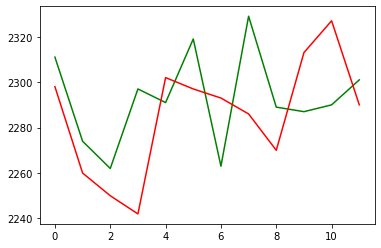

In [9]:
o = df.loc[df['types']=='original','values']
n = df.loc[df['types']=='new','values']
import matplotlib.pyplot as plt
plt.plot(np.arange(0,len(o)), o, c='g')
plt.plot(np.arange(0,len(n)), n, c='r')
plt.show()

### <font color='orange'>NORMALITY TEST</font>
- There are several tests for Normality check; some of them are Shapiro-Wilk test, Kolmogororv-Smirnov (K-S) test, Anderson-Darling test etc.
- As the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases.

##### SHAPIRO-WILK TEST
- Null hypothesis: Data is normal
- Evaluates normality by comparing the data's distribution (ordered values) to the hypothesized normal distribution
- The test of normality applies to the difference in values between the groups and may be done with Shapiro-Wilk test.

In [10]:
sampling_diff = [i-j for i,j in zip(o,n)]
print(sampling_diff)
s, p = stats.shapiro(sampling_diff)
print('p-value = {}'.format(round(p,3)))

[13, 14, 12, 55, -11, 22, -30, 43, 19, -26, -37, 11]
p-value = 0.486


As p-value>0.05, we cannot reject the null hypothesis. So, data is normal

Visually check the distribution with a probability plot with or without the correlation value, to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the probplot() method from Scipy.stats.

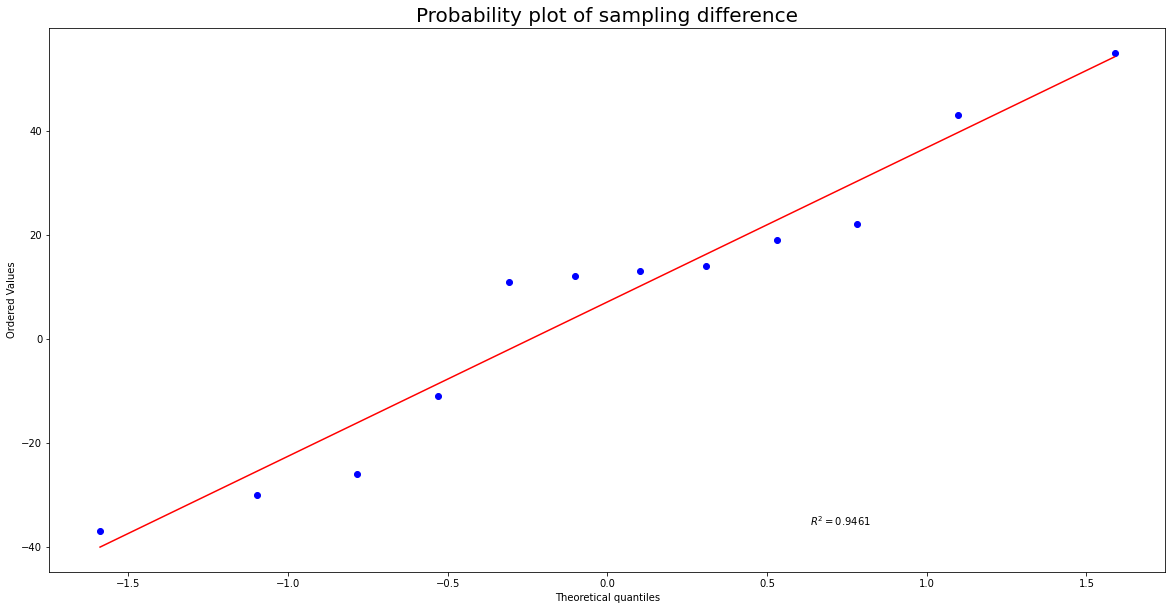

In [11]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(sampling_diff, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set
plt.show()

Both methods support the same finding which is that the sampling distribution is normally distributed.

##### ANDERSON-DARLING TEST
- Tests the null hypothesis that a sample is drawn from a population that follows a particular distribution.
- Evaluates normality by comparing the data's empirical distribution function to the expected cumulative distribution function of the comparison distribution
- If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.

In [12]:
anderson = stats.anderson(o)
anderson_sig = list(zip(anderson[1], anderson[2])) 
['REJ' if i>j else 'ACCEP' for (i,j) in anderson_sig]

['ACCEP', 'ACCEP', 'ACCEP', 'ACCEP', 'ACCEP']

##### KOLMOGOROV-SMIRNOV TEST

- One-sample test compares the underlying distribution F(x) of a sample against a given distribution G(x). 
- Two-sample test compares the underlying distributions of two independent samples.
- Null hypothesis: The 2 distributions are identical (Describes the CDFs of underlying distributions)
- If the KS statistic is small or the p-value is high, then we cannot reject the null hypothesis in favor of the alternative.
- If p-value<0.05, reject the null hypothesis

In [13]:
ks = stats.ks_2samp(o,n)
print('KS statistic for KS test = ', round(ks[0],3))
print('p-value for KS test = ', round(ks[1],3))

KS statistic for KS test =  0.25
p-value for KS test =  0.869


As p-values>0.05, we cannot reject hull hypothesis i.e. the two distributions are identical

#### <font color='orange'>TEST FOR EQUAL VARIANCE</font>
- LEVENE TEST hypothesis: Samples are drawn from populations with equal variances
- BARTLETT TEST hypothesis: Samples are drawn from populations with equal variances

In [14]:
lv = stats.levene(o,n, center='mean')
print('p-value for Equal variance with Levene test = ', round(lv[1],3))

p-value for Equal variance with Levene test =  0.419


As p-value> 0.05, we reject the null hypothesis

In [15]:
bt = stats.bartlett(o,n)
print('p-value for Equal variance with Bartlett test = ', round(bt[1],3))

p-value for Equal variance with Bartlett test =  0.488


As p-value> 0.05, we reject the null hypothesis